<a href="https://colab.research.google.com/github/pranaaph/Data-Analysis/blob/main/Statistical_Analysis_Assignment_2_Pranaaph_R.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


Given a dataset consisting of the type of car used by person along with the other variables giving details of travel time, use and age of the car.  
1. Perform Exploratory data Analysis.
2. Remove duplicates.
3. Treat the missing values
4. Check for outliers and treat it.
5. Do normalization and Scaling wherever necessary.
6.  Also perform univariate and bi variate analysis.
7. Also do encoding wherever necessary

### **Importing the Packages**

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import zscore
import scipy.stats as stats
from scipy.stats import shapiro
import warnings
warnings.filterwarnings("ignore", category=UserWarning)

In [ ]:
from google.colab import drive

### **Importing the data as Dataframe**

In [ ]:
drive.mount('/content/drive')
%cd /content/drive/MyDrive/Colab Notebooks/'Python DataScience'
!ls

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
/content/drive/MyDrive/Colab Notebooks/Python DataScience
'Assignment_2 - Car_Dataset.ipynb'   hotel_bookings.csv		    NLP_Dataset.csv
'Car dataset.xlsx'		    'hotel_bookings raw data.csv'  'Text _Preprocesing.ipynb'
 EDA_Practice.ipynb		     NLP_Assignment_2.ipynb	    Untitled0.ipynb


In [ ]:
carsData = pd.read_excel('Car dataset.xlsx')
carsDataCopy =  carsData.copy()

### **1.Perform Exploratory data Analysis.**

   **Data Inspection**

In [ ]:
carsData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   INDEX           303 non-null    int64  
 1   INCOME          260 non-null    float64
 2   MARITAL STATUS  275 non-null    object 
 3   SEX             297 non-null    object 
 4   EDUCATION       259 non-null    object 
 5   JOB             257 non-null    object 
 6   TRAVEL TIME     262 non-null    float64
 7   USE             250 non-null    object 
 8   MILES CLOCKED   278 non-null    float64
 9   CAR TYPE        293 non-null    object 
 10  CAR AGE         283 non-null    float64
 11  CITY            297 non-null    object 
 12  POSTAL CODE     300 non-null    float64
dtypes: float64(5), int64(1), object(7)
memory usage: 30.9+ KB


In [ ]:
carsData.head()

,INDEX,INCOME,MARITAL STATUS,SEX,EDUCATION,JOB,TRAVEL TIME,USE,MILES CLOCKED,CAR TYPE,CAR AGE,CITY,POSTAL CODE
0,1,125301.24250,No,F,Bachelors,Blue Collar,45.703013,Commercial,17430.0,Sports Car,7.0,Texas,42420.0
1,2,50815.44531,No,M,High School,NaN,20.591628,Private,18930.0,Minivan,1.0,Texas,42420.0
2,3,62977.82416,NaN,F,Bachelors,Clerical,33.639949,Private,NaN,SUV,1.0,Texas,42420.0
3,4,77099.96624,No,F,NaN,Lawyer,15.415676,NaN,18300.0,Sports Car,11.0,Texas,42420.0
4,5,130794.57420,No,M,High School,NaN,NaN,Commercial,28340.0,Panel Truck,10.0,Texas,42420.0


In [ ]:
carsData.tail()

,INDEX,INCOME,MARITAL STATUS,SEX,EDUCATION,JOB,TRAVEL TIME,USE,MILES CLOCKED,CAR TYPE,CAR AGE,CITY,POSTAL CODE
298,285,15251.52473,No,M,High School,Clerical,31.315058,Private,3030.0,Sports Car,1.0,Las Vegas,44412.0
299,286,18408.39545,No,M,High School,Clerical,42.619118,Private,7440.0,NaN,1.0,Las Vegas,NaN
300,287,NaN,No,M,High School,Clerical,36.533624,Private,7660.0,SUV,NaN,Las Vegas,44412.0
301,288,NaN,Yes,F,High School,NaN,60.884292,Private,19550.0,Van,1.0,Las Vegas,44412.0
302,289,0.00000,No,M,Bachelors,Student,11.657483,Commercial,19940.0,SUV,7.0,Las Vegas,44412.0


In [ ]:
print ("Number of rows in the given dataset    : ",carsData.shape[0])
print ("Number of columns in the given dataset : ",carsData.shape[1])

Number of rows in the given dataset    :  303
Number of columns in the given dataset :  13


In [ ]:
carsData.describe().T

,count,mean,std,min,25%,50%,75%,max
INDEX,303.0,139.640264,85.178422,1.0,62.500000,138.000000,213.500000,289.000000
INCOME,260.0,50025.162170,41186.807914,0.0,20452.885023,44571.590870,66485.761387,204667.589700
TRAVEL TIME,262.0,34.282098,14.910178,5.0,24.449874,33.564757,43.907339,83.617643
MILES CLOCKED,278.0,13591.978417,7167.328655,1500.0,7900.000000,12065.000000,18240.000000,38000.000000
CAR AGE,283.0,6.265018,5.111218,1.0,1.000000,6.000000,10.000000,20.000000
POSTAL CODE,300.0,50712.196667,24141.029290,11435.0,42420.000000,47150.000000,61701.000000,90049.000000


In [ ]:
carsData.dtypes

INDEX               int64
INCOME            float64
MARITAL STATUS     object
SEX                object
EDUCATION          object
JOB                object
TRAVEL TIME       float64
USE                object
MILES CLOCKED     float64
CAR TYPE           object
CAR AGE           float64
CITY               object
POSTAL CODE       float64
dtype: object

### **Checking for Duplicates**

In [ ]:
carsDataDuplicates = carsData.duplicated()
print("Total no of duplicate records = ",(carsDataDuplicates.sum()))

Total no of duplicate records =  14


In [ ]:
displayDuplicates = carsData[carsData.duplicated()]
displayDuplicates

,INDEX,INCOME,MARITAL STATUS,SEX,EDUCATION,JOB,TRAVEL TIME,USE,MILES CLOCKED,CAR TYPE,CAR AGE,CITY,POSTAL CODE
69,29,64013.81632,Yes,M,High School,Blue Collar,32.717234,Commercial,7900.0,Pickup,5.0,Los Angeles,90049.0
70,29,64013.81632,Yes,M,High School,Blue Collar,32.717234,Commercial,7900.0,Pickup,5.0,Los Angeles,90049.0
71,29,64013.81632,Yes,M,High School,Blue Collar,32.717234,Commercial,7900.0,Pickup,5.0,Los Angeles,90049.0
72,29,64013.81632,Yes,M,High School,Blue Collar,32.717234,Commercial,7900.0,Pickup,5.0,Los Angeles,90049.0
73,29,64013.81632,Yes,M,High School,Blue Collar,32.717234,Commercial,7900.0,Pickup,5.0,Los Angeles,90049.0
74,29,64013.81632,Yes,M,High School,Blue Collar,32.717234,Commercial,7900.0,Pickup,5.0,Los Angeles,90049.0
75,29,64013.81632,Yes,M,High School,Blue Collar,32.717234,Commercial,7900.0,Pickup,5.0,Los Angeles,90049.0
76,29,64013.81632,Yes,M,High School,Blue Collar,32.717234,Commercial,7900.0,Pickup,5.0,Los Angeles,90049.0
77,29,64013.81632,Yes,M,High School,Blue Collar,32.717234,Commercial,7900.0,Pickup,5.0,Los Angeles,90049.0
78,29,64013.81632,Yes,M,High School,Blue Collar,32.717234,Commercial,7900.0,Pickup,5.0,Los Angeles,90049.0


### **2.Remove duplicates.**

In [ ]:
#Drop the duplicated records
carsData.drop_duplicates(inplace = True)
carsDataDuplicates = carsData.duplicated()
print("Total no of duplicate records = ",(carsDataDuplicates.sum()))

Total no of duplicate records =  0


**Inference:** In the given dataset, There are 14 duplicted records were present.
           So, the duplicated record are now removed.

### **Checking For Null Values**

In [ ]:
carsDataCopy.isnull().sum()

INDEX              0
INCOME            43
MARITAL STATUS    28
SEX                6
EDUCATION         44
JOB               46
TRAVEL TIME       41
USE               53
MILES CLOCKED     25
CAR TYPE          10
CAR AGE           20
CITY               6
POSTAL CODE        3
dtype: int64

**Inference:**
    Other than the variable 'INDEX' , all variables have null values.

In [ ]:
carsDataCopy['null_count'] = carsDataCopy.isnull().sum(axis=1)
noOfNullValues = carsDataCopy.sort_values(by='null_count', ascending=False)
noOfNullValues

,INDEX,INCOME,MARITAL STATUS,SEX,EDUCATION,JOB,TRAVEL TIME,USE,MILES CLOCKED,CAR TYPE,CAR AGE,CITY,POSTAL CODE,null_count
157,144,108743.60760,NaN,M,Masters,NaN,NaN,Commercial,5430.0,Pickup,NaN,Houston,61701.0,4
8,9,NaN,NaN,F,NaN,Clerical,26.392961,NaN,10030.0,SUV,1.0,Texas,42420.0,4
47,48,49703.42492,No,M,NaN,NaN,NaN,Commercial,NaN,Panel Truck,20.0,New Albany,47150.0,4
54,55,21281.93453,NaN,M,High School,NaN,39.710769,NaN,18150.0,Van,NaN,New Albany,47150.0,4
252,239,NaN,No,NaN,Masters,Lawyer,8.760570,Private,NaN,NaN,20.0,Washington,11435.0,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
168,155,99268.97416,No,M,Bachelors,Professional,34.285363,Commercial,25910.0,Panel Truck,10.0,Seattle,78207.0,0
169,156,31407.30199,No,F,High School,Blue Collar,42.492016,Commercial,11890.0,SUV,1.0,Seattle,78207.0,0
170,157,24546.04016,No,F,High School,Professional,38.647776,Private,11100.0,SUV,9.0,Seattle,78207.0,0
171,158,53356.86970,Yes,M,High School,Professional,17.873723,Commercial,26810.0,Panel Truck,1.0,Seattle,78207.0,0


### **3. Treat the missing values**

In [ ]:
carsData['MARITAL STATUS'].fillna(carsData['MARITAL STATUS'].mode()[0], inplace = True)

In [ ]:
carsData['SEX'].fillna( carsData['SEX'].mode()[0], inplace = True)

In [ ]:
carsData['CAR TYPE'].fillna(carsData['CAR TYPE'].mode()[0] , inplace = True)

In [ ]:
carsData['EDUCATION'].fillna(carsData['EDUCATION'].mode()[0] , inplace = True)

In [ ]:
carsData['JOB'].fillna('Not Mentioned' , inplace = True)

In [ ]:
carsData['USE'].fillna(carsData['USE'].mode()[0], inplace = True)

In [ ]:
carsData['CITY'].fillna('Others' , inplace = True)

In [ ]:
carsData['INCOME'].fillna(carsData['INCOME'].mean() , inplace = True)

In [ ]:
carsData['TRAVEL TIME'].fillna(carsData['TRAVEL TIME'].median(), inplace = True)

In [ ]:
carsData['MILES CLOCKED'].fillna(carsData['MILES CLOCKED'].mean(), inplace = True)

In [ ]:
carsData['CAR AGE'].fillna(carsData['CAR AGE'].mean(), inplace = True)

In [ ]:
carsData.isnull().sum()

INDEX             0
INCOME            0
MARITAL STATUS    0
SEX               0
EDUCATION         0
JOB               0
TRAVEL TIME       0
USE               0
MILES CLOCKED     0
CAR TYPE          0
CAR AGE           0
CITY              0
POSTAL CODE       3
dtype: int64

### **Removing the Unwanted columns**

In [ ]:
carsData = carsData.drop(['INDEX','POSTAL CODE'] , axis=1)

### **4.Check for outliers and treat it.**

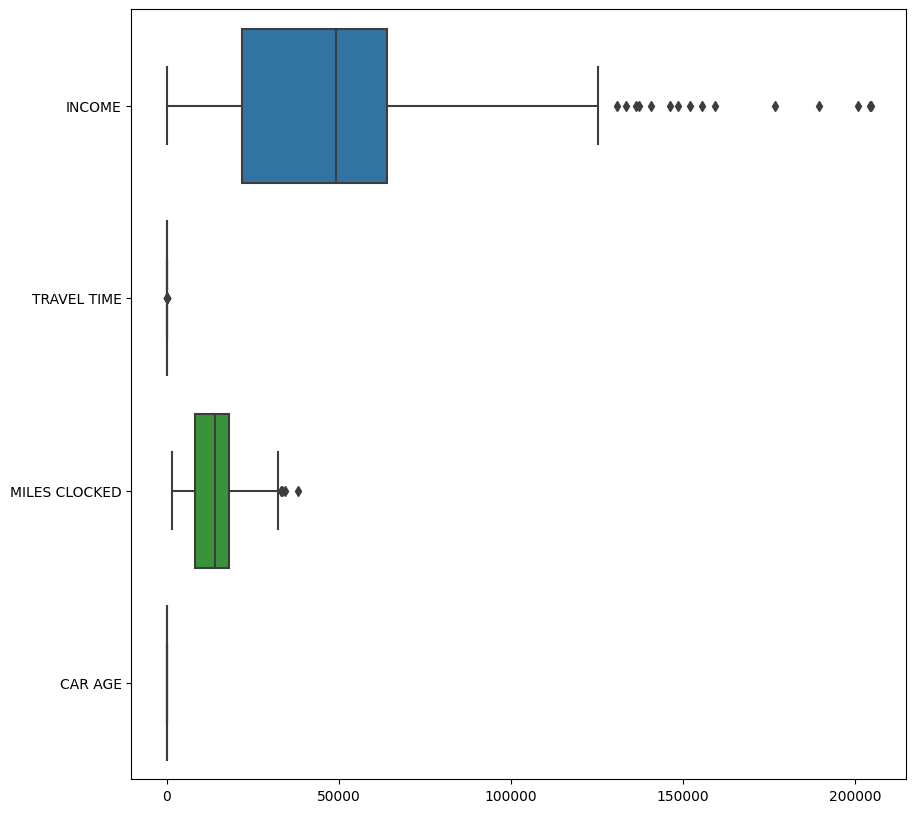

In [ ]:
plt.figure(figsize=(10, 10))
sns.boxplot(carsData,orient='h')
plt.show()

### **Three Standard Deviation Approach for identifing the outliers**

In [ ]:
upperLimitForMiles = carsData['MILES CLOCKED'].mean()+3*carsData['MILES CLOCKED'].std()
upperLimitForMiles

34624.254808237645

In [ ]:
lowerLimitForMiles = carsData['MILES CLOCKED'].mean()-3*carsData['MILES CLOCKED'].std()
lowerLimitForMiles

-6836.603293086137

In [ ]:
carsData[(carsData['MILES CLOCKED']> upperLimitForMiles) | (carsData['MILES CLOCKED']< lowerLimitForMiles) ]

,INCOME,MARITAL STATUS,SEX,EDUCATION,JOB,TRAVEL TIME,USE,MILES CLOCKED,CAR TYPE,CAR AGE,CITY
275,105276.6218,No,M,Bachelors,Professional,30.044447,Private,38000.0,Van,1.0,Las Vegas


### **Z-Score Approach for handling the outliers**

In [ ]:
#Numerical variables for z-score calculation
numericVariables = carsData.select_dtypes(include=np.number)

# Calculating z-scores
zScores = zscore(numericVariables)

# Creating a DataFrame with z-scores
zScoresDF = pd.DataFrame(zScores, columns=numericVariables.columns)

# Identify outliers based on a threshold which is 3
threshold = 3
outliers_mask = (np.abs(zScoresDF) > threshold)

# Displaying the outliers
outliers = carsData[outliers_mask.any(axis=1)]
print("Rows with outliers:")
outliers


Rows with outliers:


,INCOME,MARITAL STATUS,SEX,EDUCATION,JOB,TRAVEL TIME,USE,MILES CLOCKED,CAR TYPE,CAR AGE,CITY
51,44781.81586,No,F,High School,Clerical,82.611453,Private,30260.0,SUV,9.000000,New Albany
156,200771.92430,No,F,PhD,Doctor,34.426446,Private,9270.0,SUV,6.330855,Houston
162,204372.95510,Yes,M,High School,Not Mentioned,34.426446,Commercial,5100.0,Pickup,20.000000,Houston
187,59762.84945,No,M,Bachelors,Professional,83.617643,Commercial,6000.0,Pickup,1.000000,Seattle
199,176848.94830,Yes,F,Bachelors,Blue Collar,37.103735,Commercial,26470.0,SUV,4.000000,Seattle
254,204667.58970,Yes,F,Masters,Not Mentioned,31.515561,Commercial,21970.0,Van,6.330855,Others
267,189554.85860,No,M,PhD,Doctor,34.623548,Private,1500.0,SUV,16.000000,Las Vegas
275,105276.62180,No,M,Bachelors,Professional,30.044447,Private,38000.0,Van,1.000000,Las Vegas


In [ ]:
# Remove rows with outliers
carsDataWithNoOutliers = carsData[~outliers_mask.any(axis=1)]

# Display the DataFrame without outliers
print("DataFrame without outliers:")
carsDataWithNoOutliers

DataFrame without outliers:


,INCOME,MARITAL STATUS,SEX,EDUCATION,JOB,TRAVEL TIME,USE,MILES CLOCKED,CAR TYPE,CAR AGE,CITY
0,125301.242500,No,F,Bachelors,Blue Collar,45.703013,Commercial,17430.000000,Sports Car,7.000000,Texas
1,50815.445310,No,M,High School,Not Mentioned,20.591628,Private,18930.000000,Minivan,1.000000,Texas
2,62977.824160,No,F,Bachelors,Clerical,33.639949,Private,13893.825758,SUV,1.000000,Texas
3,77099.966240,No,F,High School,Lawyer,15.415676,Private,18300.000000,Sports Car,11.000000,Texas
4,130794.574200,No,M,High School,Not Mentioned,34.426446,Commercial,28340.000000,Panel Truck,10.000000,Texas
...,...,...,...,...,...,...,...,...,...,...,...
298,15251.524730,No,M,High School,Clerical,31.315058,Private,3030.000000,Sports Car,1.000000,Las Vegas
299,18408.395450,No,M,High School,Clerical,42.619118,Private,7440.000000,SUV,1.000000,Las Vegas
300,49229.059901,No,M,High School,Clerical,36.533624,Private,7660.000000,SUV,6.330855,Las Vegas
301,49229.059901,Yes,F,High School,Not Mentioned,60.884292,Private,19550.000000,Van,1.000000,Las Vegas


### **Normalization and Scaling**

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()


incomeVariable = carsDataWithNoOutliers[['INCOME']]
milesClockedVariable = carsDataWithNoOutliers[['MILES CLOCKED']]

# Fit and transform the data
scaledIncomeVariable = scaler.fit_transform(incomeVariable)
scaledMilesClockedVariable = scaler.fit_transform(milesClockedVariable)

carsDataWithNoOutliers['INCOME'] = scaledIncomeVariable

carsDataWithNoOutliers['MILES CLOCKED'] = scaledMilesClockedVariable


<ipython-input-186-94aa273a7b84>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  carsDataWithNoOutliers['INCOME'] = scaledIncomeVariable
<ipython-input-186-94aa273a7b84>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  carsDataWithNoOutliers['MILES CLOCKED'] = scaledMilesClockedVariable


In [ ]:
carsDataWithNoOutliers.head()

,INCOME,MARITAL STATUS,SEX,EDUCATION,JOB,TRAVEL TIME,USE,MILES CLOCKED,CAR TYPE,CAR AGE,CITY
0,0.786085,No,F,Bachelors,Blue Collar,45.703013,Commercial,0.485523,Sports Car,7.0,Texas
1,0.318794,No,M,High School,Not Mentioned,20.591628,Private,0.531240,Minivan,1.0,Texas
2,0.395095,No,F,Bachelors,Clerical,33.639949,Private,0.377745,SUV,1.0,Texas
3,0.483692,No,F,High School,Lawyer,15.415676,Private,0.512039,Sports Car,11.0,Texas
4,0.820548,No,M,High School,Not Mentioned,34.426446,Commercial,0.818043,Panel Truck,10.0,Texas


### **Inference:**

    The Varaiables 'Income' and 'Miles Clocked' are scaled.

### **Univariate and bi variate analysis.**

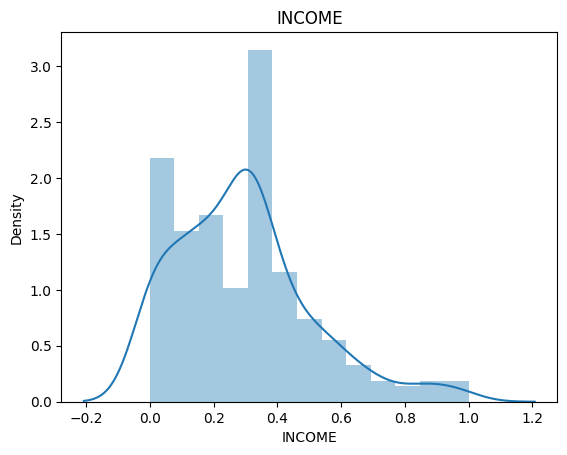

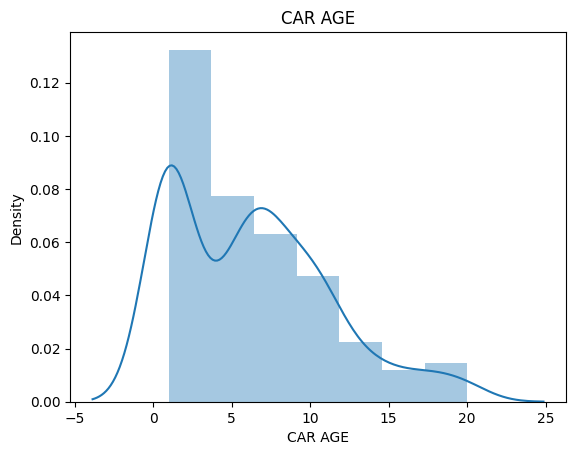

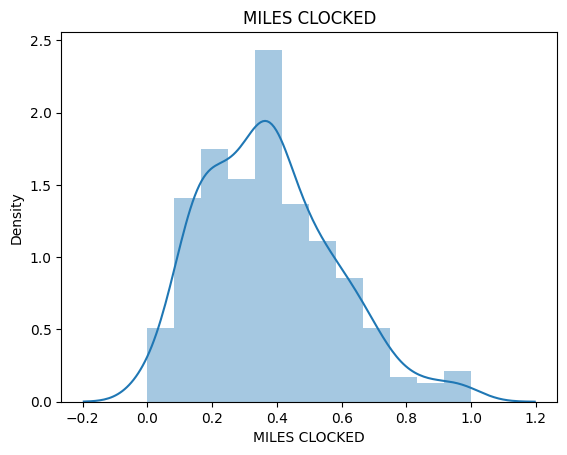

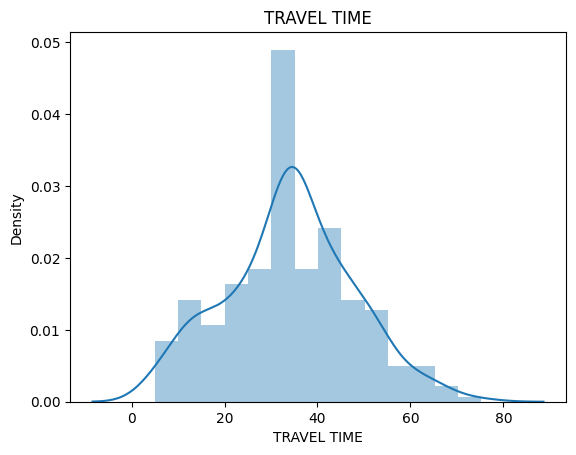

In [ ]:
#Univariate analysis for Numerical Variables
numericalVariables = ['INCOME', 'CAR AGE','MILES CLOCKED','TRAVEL TIME']
for variable in numericalVariables:
  plt.title(variable)
  sns.distplot(carsDataWithNoOutliers[variable])
  plt.show()

In [ ]:
for variable in numericalVariables:
  stat, pValue = shapiro(carsDataWithNoOutliers[variable])
  if pValue > 0.05:
      print(f"The variable '{variable}' appears to be normally distributed.")
  else:
      print(f"The variable '{variable}' does not appear to be normally distributed.")

The variable 'INCOME' does not appear to be normally distributed.
The variable 'CAR AGE' does not appear to be normally distributed.
The variable 'MILES CLOCKED' does not appear to be normally distributed.
The variable 'TRAVEL TIME' does not appear to be normally distributed.


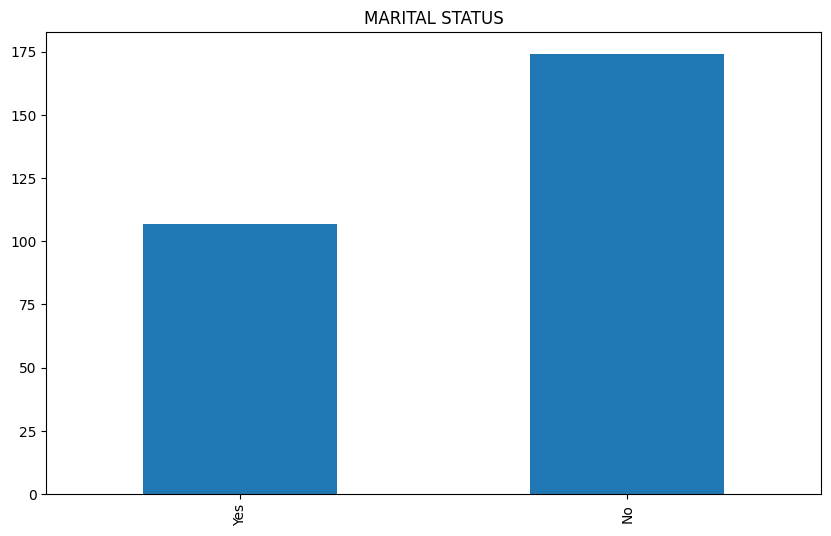

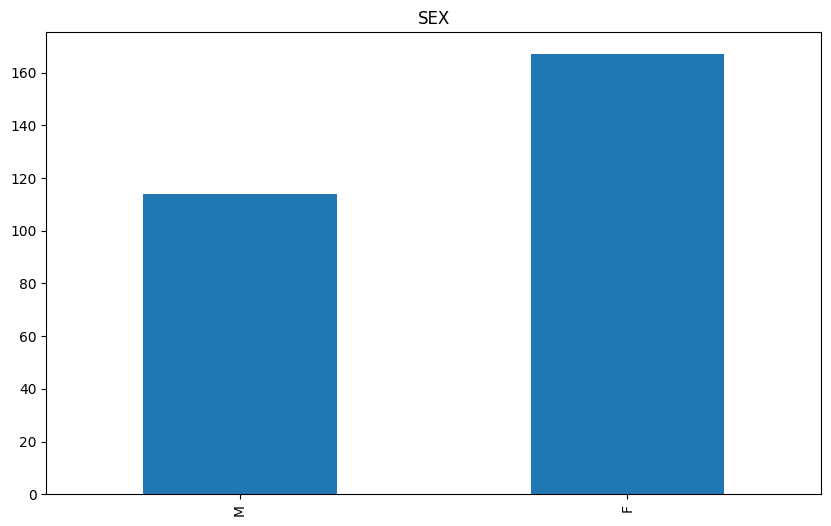

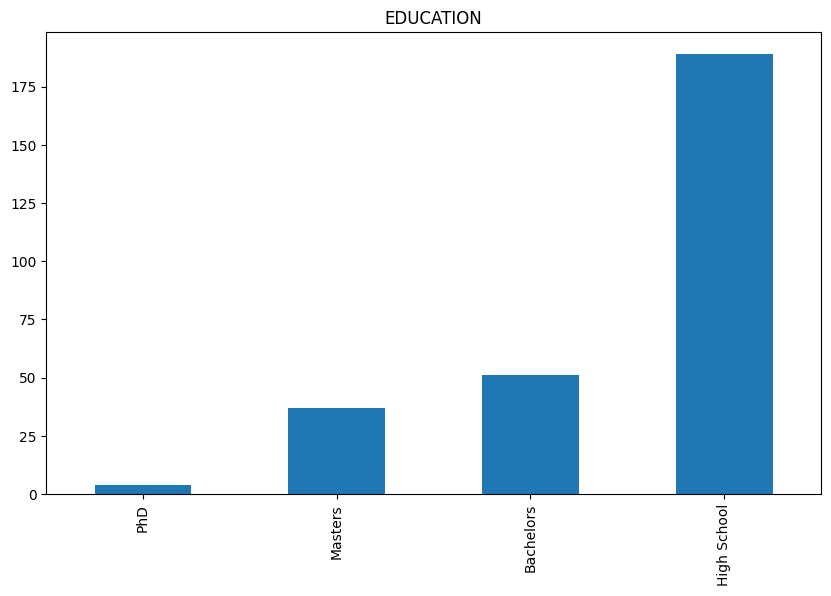

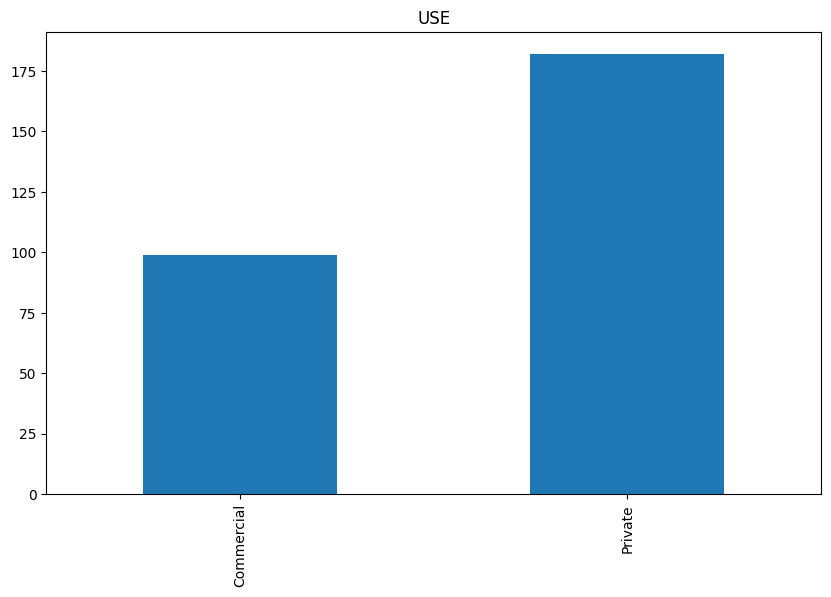

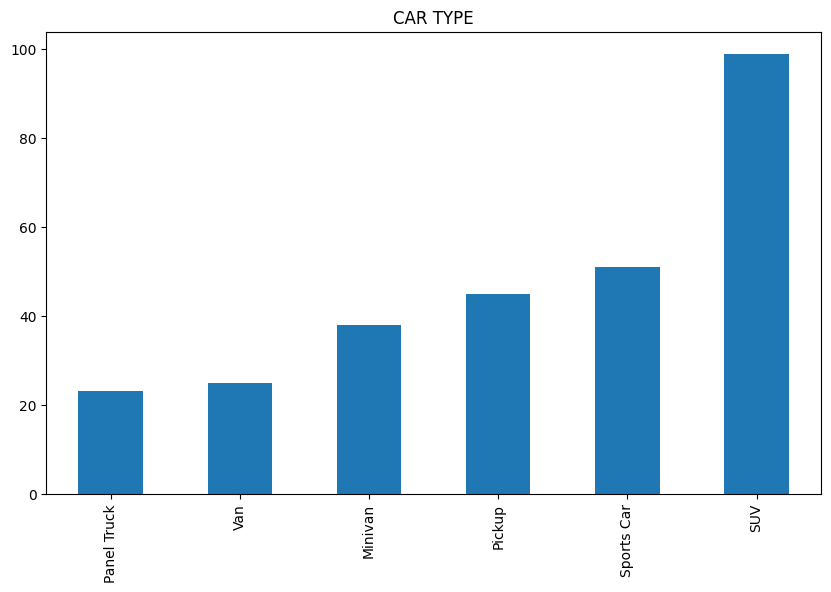

In [ ]:
# Univariate analysis for categorical variables
categoricalVariables = ['MARITAL STATUS', 'SEX' , 'EDUCATION' , 'USE' , 'CAR TYPE']

# Bar plots for categorical variables
for variable in categoricalVariables:
    plt.figure(figsize=(10, 6))
    carsDataWithNoOutliers[variable].value_counts().sort_values().plot(kind='bar')  #horizontal bar plot
    plt.title(variable)
    plt.show()

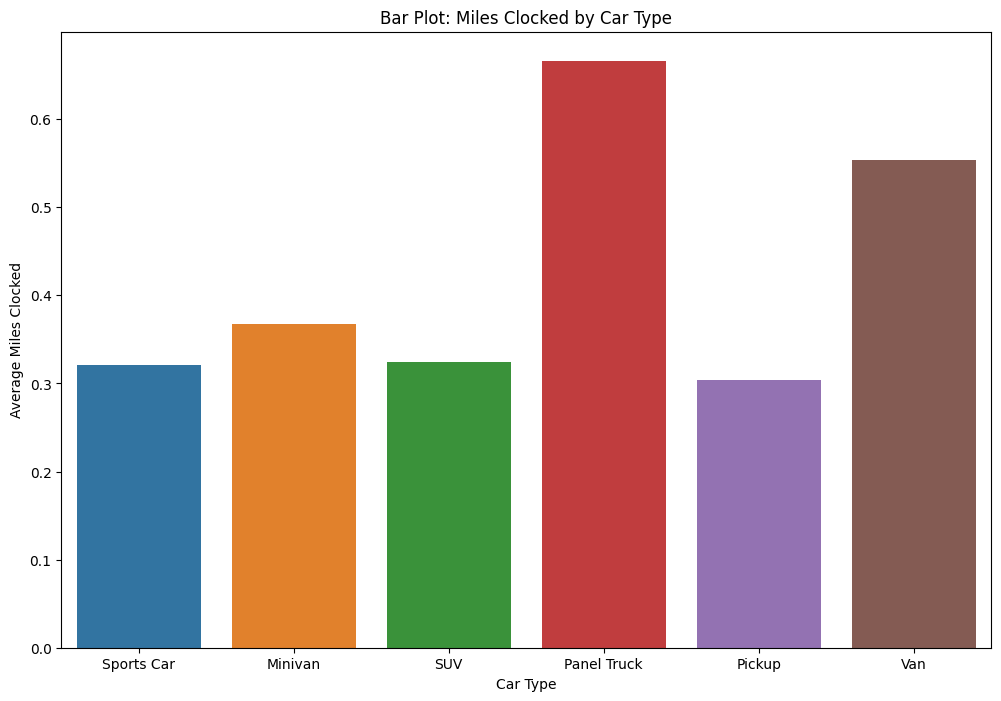

In [ ]:
plt.figure(figsize=(12, 8))
sns.barplot(x='CAR TYPE', y='MILES CLOCKED', data=carsDataWithNoOutliers , errorbar = None)
plt.title('Bar Plot: Miles Clocked by Car Type')
plt.xlabel('Car Type')
plt.ylabel('Average Miles Clocked')
plt.show()


<ipython-input-192-e6e9a3e643c6>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation = carsDataWithNoOutliers.corr()


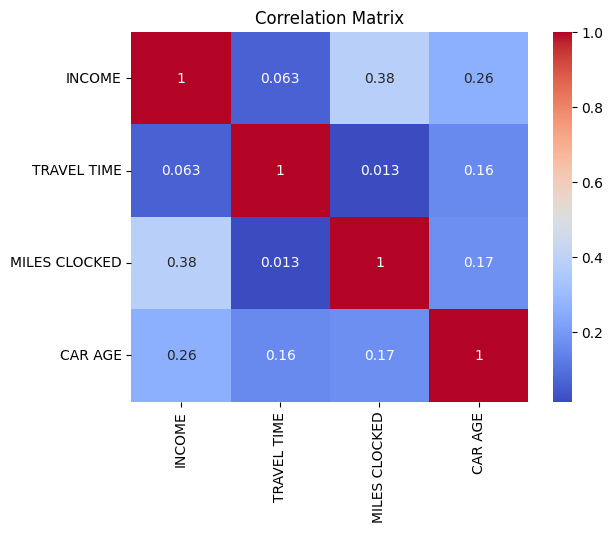

In [ ]:
#Bivariate analysis
correlation = carsDataWithNoOutliers.corr()
sns.heatmap(correlation, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()


### **Inference:**


There is no correlation between the variables where the correlation coefficient is nearly equal to zero.

### **Also do encoding wherever necessary**

In [ ]:
# Perform one-hot encoding
carsDataEncoded = pd.get_dummies(carsDataWithNoOutliers, columns=['MARITAL STATUS', 'SEX','EDUCATION','JOB','USE','CAR TYPE','CITY'], drop_first=True)
carsDataEncoded.head()

,INCOME,TRAVEL TIME,MILES CLOCKED,CAR AGE,MARITAL STATUS_Yes,SEX_M,EDUCATION_High School,EDUCATION_Masters,EDUCATION_PhD,JOB_Clerical,...,CITY_Las Vegas,CITY_Los Angeles,CITY_New Albany,CITY_New York City,CITY_Others,CITY_Philadelphia,CITY_San Francisco,CITY_Seattle,CITY_Texas,CITY_Washington
0,0.786085,45.703013,0.485523,7.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1,0.318794,20.591628,0.531240,1.0,0,1,1,0,0,0,...,0,0,0,0,0,0,0,0,1,0
2,0.395095,33.639949,0.377745,1.0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,1,0
3,0.483692,15.415676,0.512039,11.0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,1,0
4,0.820548,34.426446,0.818043,10.0,0,1,1,0,0,0,...,0,0,0,0,0,0,0,0,1,0


### **Inference:**

The categorical variables are encoded using one hot encoding.